In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
X,y=load_iris(return_X_y=True)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [67]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,concatenate
from tensorflow.keras.utils import plot_model

In [57]:
LEARNING_RATE=0.01
EPOCHS=30
BATCH_SIZE=32

In [10]:
model=Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 753 (2.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [63]:
plot_model(model,show_shapes=True,dpi=100)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Functional API

In [66]:
X_input=Input(shape=(4,))
X_dense1=Dense(10,activation='relu')(X_input)
X_dense2=Dense(20,activation='relu')(X_dense1)
X_output=Dense(3,activation='softmax')(X_dense2)
model= Model(inputs=X_input,outputs=X_output)

In [71]:
X_input=Input(shape=(4,))
X_dense1=Dense(10,activation='relu')(X_input)
X_dense2=Dense(10,activation='relu')(X_input)

merged= concatenate([X_dense1,X_dense2])
X_output=Dense(3,activation='softmax')(merged)
model1=Model(inputs=X_input,outputs=X_output)

In [52]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
adam_opt=Adam()
sgd=SGD()
rms=RMSprop()
ada=Adagrad()


In [46]:
model.compile(
    optimizer=adam_opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.compile(
    optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
model.compile(
    optimizer=rms,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.compile(
    optimizer=ada,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9737 - val_loss: 0.0379
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9821 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss: 0.0382
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9821 - loss: 0.0522 - val_accuracy: 0.9737 - val_loss: 0.0378
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9821 - loss: 0.0522 - val_accuracy: 0.9737 - val_loss: 0.0376
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9821 - loss: 0.0521 - val_accuracy: 0.9737 - val_loss: 0.0372
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9821 - loss: 0.0528 - val_accuracy: 0.9737 - val_loss: 0.0372
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9821 - loss: 0.0526 - val_accuracy: 0.9737 - val_loss: 0.0373
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9821 - loss: 0.0521 - val_accuracy: 0.9737 - val_loss:

In [49]:
hist1=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9821 - loss: 0.0509 - val_accuracy: 0.9737 - val_loss: 0.0383
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9286 - loss: 0.1655 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9554 - loss: 0.1105 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9732 - loss: 0.0729 - val_accuracy: 0.9211 - val_loss: 0.1864
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9554 - loss: 0.1369 - val_accuracy: 0.9737 - val_loss: 0.0375
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8393 - loss: 0.4505 - val_accuracy: 0.9737 - val_loss: 0.0406
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9643 - loss: 0.0675 - val_accuracy: 1.0000 - val_loss: 0.0481
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9821 - loss: 0.0671 - val_accuracy: 1.0000 - val_loss

In [35]:
hist2=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9643 - loss: 0.1193 - val_accuracy: 0.9737 - val_loss: 0.0469
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9732 - loss: 0.0827 - val_accuracy: 0.9737 - val_loss: 0.0417
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9732 - loss: 0.0672 - val_accuracy: 1.0000 - val_loss: 0.0450
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9732 - loss: 0.0720 - val_accuracy: 1.0000 - val_loss: 0.0475
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9732 - loss: 0.0702 - val_accuracy: 1.0000 - val_loss: 0.0427
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9732 - loss: 0.0677 - val_accuracy: 1.0000 - val_loss: 0.0549
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9732 - loss: 0.0635 - val_accuracy: 1.0000 - val_loss: 0.0469
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9732 - loss: 0.0660 - val_accuracy: 1.0000 - val_loss:

In [42]:
hist3=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9643 - loss: 0.0894 - val_accuracy: 0.9737 - val_loss: 0.0405
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9643 - loss: 0.0769 - val_accuracy: 0.9737 - val_loss: 0.0387
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9643 - loss: 0.0726 - val_accuracy: 0.9737 - val_loss: 0.0380
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9732 - loss: 0.0691 - val_accuracy: 0.9737 - val_loss: 0.0375
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9732 - loss: 0.0661 - val_accuracy: 0.9737 - val_loss: 0.0374
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9732 - loss: 0.0636 - val_accuracy: 0.9737 - val_loss: 0.0378
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9732 - loss: 0.0606 - val_accuracy: 0.9737 - val_loss: 0.0379
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9732 - loss: 0.0593 - val_accuracy: 0.9737 - val_loss:

In [14]:
model.save('iris_classifier.keras')

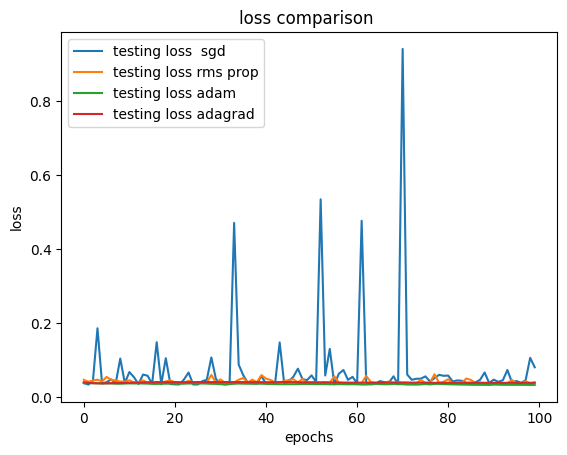

In [50]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['val_loss'],label='testing loss  sgd')
plt.plot(hist2.history['val_loss'],label='testing loss rms prop')
plt.plot(hist.history['val_loss'],label='testing loss adam')
plt.plot(hist3.history['val_loss'],label='testing loss adagrad')

plt.title('loss comparison ')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

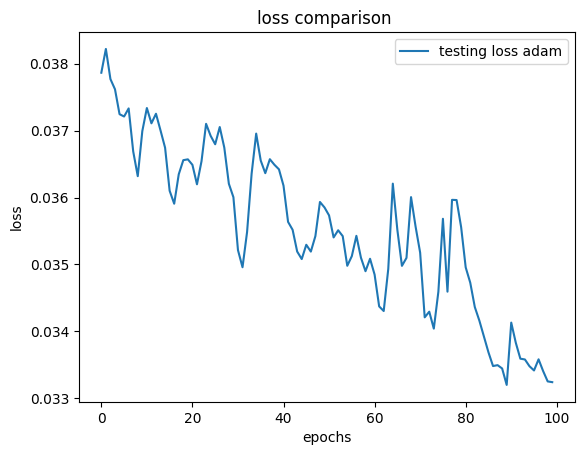

In [51]:
import matplotlib.pyplot as plt


plt.plot(hist.history['val_loss'],label='testing loss adam')

plt.title('loss comparison ')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
import numpy as np
np.argmax(model.predict(np.array([[1,2,3,4]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


np.int64(2)

In [17]:
import tensorflow as tf

model=tf.keras.models.load_model('iris_classifier.keras')